# Scaling
There are several different scalers to choose from. Each with their own pros/cons. Using sklearn's functions:

`StandardScaler()` (Z-score Normalization) removes the mean and scales to the unit variance.
$$ \frac{X_i - X_{Mean}}{X_{StandardDeviation}} $$

`MinMaxScaler()` brings all values into the range [0, 1]. Maintains the original distribution and relationships between data points.
$$ \frac{X_i - X_{Min}}{X_{Max} - X_{min}} $$

`RobustScaler()` is robust to outliers.
$$ \frac{X_i - X_{Med}}{IQR} $$

Which to use? 

"For most cases, `StandardScaler` is the scaler of choice. If you know that you have some outliers, go for the `RobustScaler`." [$^1$](https://stackoverflow.com/questions/49408371/when-to-use-min-max-scalar-and-standard-scalar/59447032#59447032)


Both `StandardScaler` and `MinMaxScaler` are very sensitive to the presence of outliers.

## Examples
First, we'll generate three features from different distributions.

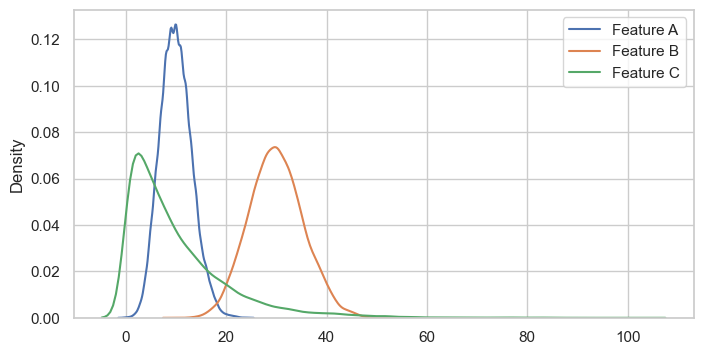

In [43]:
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer

warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['figure.figsize'] = (8, 4)

n_samples = 10000
rng = np.random.default_rng(seed=42)

# a = rng.normal(loc=20, scale=10, size=n_samples)
a = rng.poisson(lam=10, size=n_samples)
b = rng.poisson(lam=30, size=n_samples)
c = rng.exponential(scale=10, size=n_samples)

sns.kdeplot(a, label='Feature A')
sns.kdeplot(b, label='Feature B')
sns.kdeplot(c, label='Feature C')
plt.legend()
plt.show()

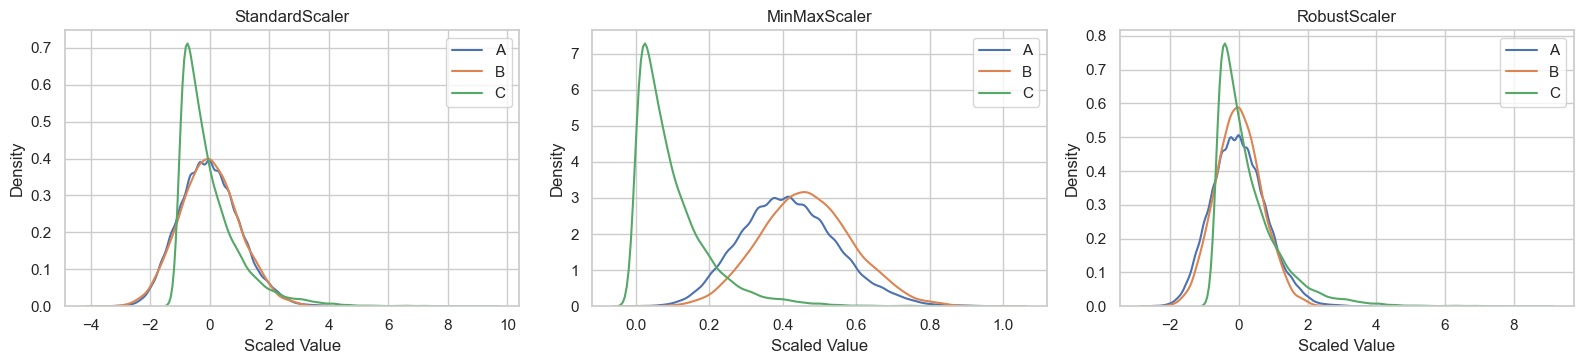

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

sns.kdeplot(StandardScaler().fit_transform(a.reshape(-1, 1)).ravel(), ax=axs[0], label='A')
sns.kdeplot(StandardScaler().fit_transform(b.reshape(-1, 1)).ravel(), ax=axs[0], label='B')
sns.kdeplot(StandardScaler().fit_transform(c.reshape(-1, 1)).ravel(), ax=axs[0], label='C')
axs[0].legend()
axs[0].set_title("StandardScaler")

sns.kdeplot(MinMaxScaler().fit_transform(a.reshape(-1, 1)).ravel(), ax=axs[1], label='A')
sns.kdeplot(MinMaxScaler().fit_transform(b.reshape(-1, 1)).ravel(), ax=axs[1], label='B')
sns.kdeplot(MinMaxScaler().fit_transform(c.reshape(-1, 1)).ravel(), ax=axs[1], label='C')
axs[1].legend()
axs[1].set_title("MinMaxScaler")

sns.kdeplot(RobustScaler().fit_transform(a.reshape(-1, 1)).ravel(), ax=axs[2], label='A')
sns.kdeplot(RobustScaler().fit_transform(b.reshape(-1, 1)).ravel(), ax=axs[2], label='B')
sns.kdeplot(RobustScaler().fit_transform(c.reshape(-1, 1)).ravel(), ax=axs[2], label='C')
axs[2].legend()
axs[2].set_title("RobustScaler")

for ax in axs:
    ax.set_xlabel("Scaled Value")
    ax.set_ylabel("Density")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

`QuantileTransformer()`

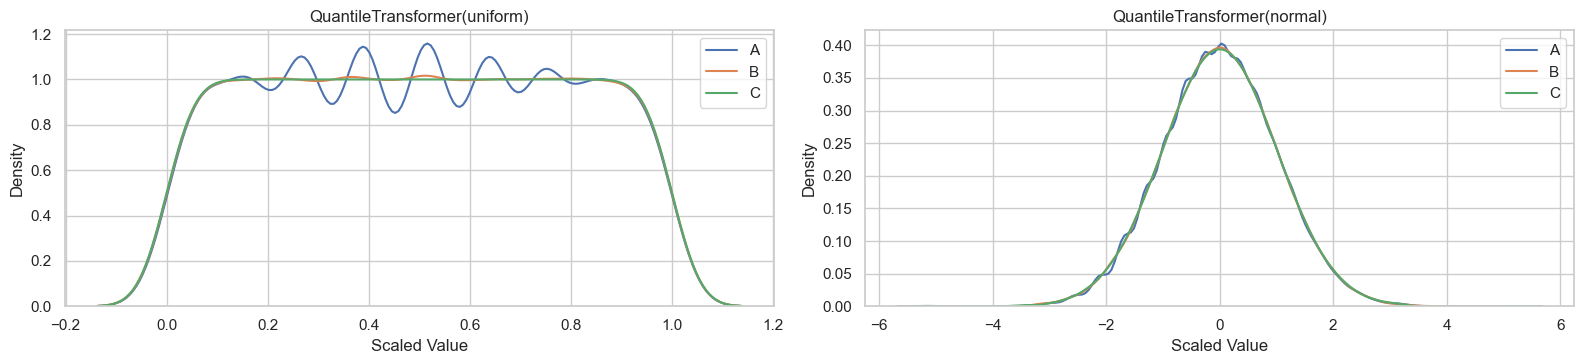

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

sns.kdeplot(QuantileTransformer().fit_transform(a.reshape(-1, 1)).ravel(), ax=axs[0], label='A')
sns.kdeplot(QuantileTransformer().fit_transform(b.reshape(-1, 1)).ravel(), ax=axs[0], label='B')
sns.kdeplot(QuantileTransformer().fit_transform(c.reshape(-1, 1)).ravel(), ax=axs[0], label='C')
axs[0].legend()
axs[0].set_title("QuantileTransformer(uniform)")

sns.kdeplot(QuantileTransformer(output_distribution='normal').fit_transform(a.reshape(-1, 1)).ravel(), ax=axs[1], label='A')
sns.kdeplot(QuantileTransformer(output_distribution='normal').fit_transform(b.reshape(-1, 1)).ravel(), ax=axs[1], label='B')
sns.kdeplot(QuantileTransformer(output_distribution='normal').fit_transform(c.reshape(-1, 1)).ravel(), ax=axs[1], label='C')
axs[1].legend()
axs[1].set_title("QuantileTransformer(normal)")

for ax in axs:
    ax.set_xlabel("Scaled Value")
    ax.set_ylabel("Density")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Scalers vs Distributions 

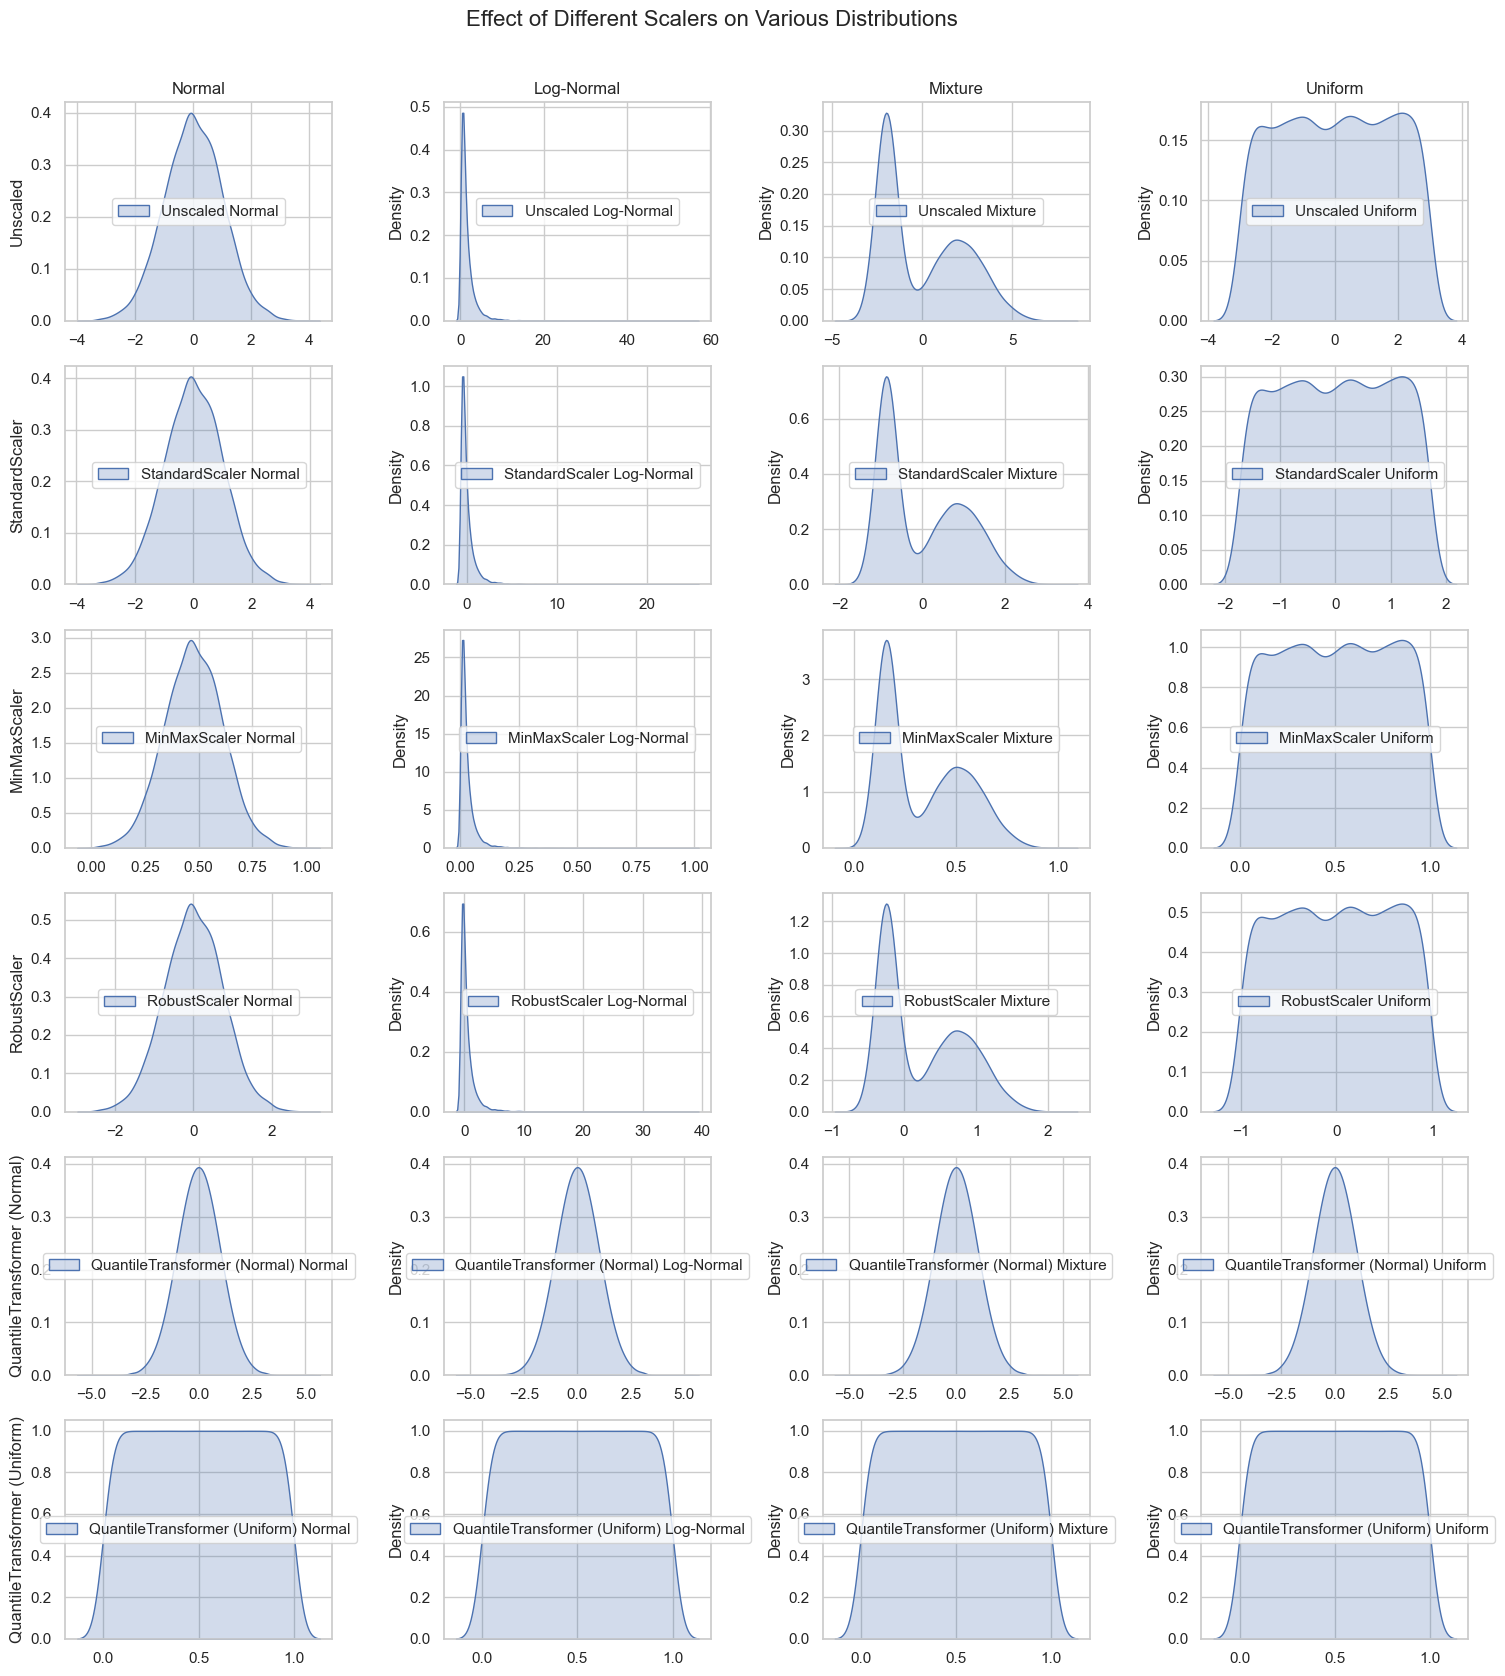

In [46]:
sns.set_theme(style="whitegrid")

distributions = {
    "Normal": rng.normal(loc=0, scale=1, size=n_samples),
    "Log-Normal": rng.lognormal(mean=0, sigma=1, size=n_samples),
    "Mixture": np.concatenate([
                rng.normal(loc=-2, scale=0.5, size=n_samples // 2),
                rng.normal(loc=2, scale=1.5, size=n_samples // 2)
            ]),
    "Uniform": rng.uniform(low=-3, high=3, size=n_samples),
}
scalers = [
    ("Unscaled", None),
    ("StandardScaler", StandardScaler()),
    ("MinMaxScaler", MinMaxScaler()),
    ("RobustScaler", RobustScaler()),
    ("QuantileTransformer (Normal)", QuantileTransformer(output_distribution='normal')),
    ("QuantileTransformer (Uniform)", QuantileTransformer(output_distribution='uniform')),
]

n_rows = len(scalers)
n_cols = len(distributions)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))

# Iterate over scalers and distributions to plot
for row_idx, (scaler_name, scaler) in enumerate(scalers):
    for col_idx, (dist_name, data) in enumerate(distributions.items()):
        ax = axs[row_idx, col_idx] if n_rows > 1 else axs[col_idx]
        data = data.reshape(-1, 1)
        
        # Apply scaler if not unscaled
        scaled_data = scaler.fit_transform(data) if scaler is not None else data
        sns.kdeplot(scaled_data.ravel(), ax=ax, label=f'{scaler_name} {dist_name}', shade=True)
        ax.legend(loc='center')
        # Set title for the top row
        if row_idx == 0:
            ax.set_title(dist_name, fontsize=12)
        
        # Set ylabel for the first column
        if col_idx == 0:
            ax.set_ylabel(scaler_name, fontsize=12)
        
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.suptitle('Effect of Different Scalers on Various Distributions', fontsize=16)
plt.show()